In [1]:
import pandas as pd 
import polars as pl
import polars.selectors as cs
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
%run -i "EDA_utils.py"

In [3]:
df = pd.read_csv("./creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df= pl.from_dataframe(df)
df.schema

Schema([('Time', Float64),
        ('V1', Float64),
        ('V2', Float64),
        ('V3', Float64),
        ('V4', Float64),
        ('V5', Float64),
        ('V6', Float64),
        ('V7', Float64),
        ('V8', Float64),
        ('V9', Float64),
        ('V10', Float64),
        ('V11', Float64),
        ('V12', Float64),
        ('V13', Float64),
        ('V14', Float64),
        ('V15', Float64),
        ('V16', Float64),
        ('V17', Float64),
        ('V18', Float64),
        ('V19', Float64),
        ('V20', Float64),
        ('V21', Float64),
        ('V22', Float64),
        ('V23', Float64),
        ('V24', Float64),
        ('V25', Float64),
        ('V26', Float64),
        ('V27', Float64),
        ('V28', Float64),
        ('Amount', Float64),
        ('Class', Int64)])

In [5]:
df.shape

(284807, 31)

In [6]:
df.describe()

statistic,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",94813.859575,1.1307e-15,3.6644e-16,-1.3449e-15,2.0458e-15,1.0307e-15,1.4924e-15,-5.9047e-16,8.7818e-17,-2.3695e-15,2.2651e-15,1.6655e-15,-1.2339e-15,8.0649e-16,1.1793e-15,4.8866e-15,1.4697e-15,-3.9748e-16,9.2533e-16,1.0161e-15,6.5863e-16,1.8043e-16,-3.2952e-16,2.3222e-16,4.4567e-15,4.9697e-16,1.7068e-15,-3.5062e-16,-1.1137e-16,88.349619,0.001727
"""std""",47488.145955,1.958696,1.651309,1.516255,1.415869,1.380247,1.332271,1.237094,1.194353,1.098632,1.08885,1.020713,0.999201,0.995274,0.958596,0.915316,0.876253,0.849337,0.838176,0.814041,0.770925,0.734524,0.725702,0.62446,0.605647,0.521278,0.482227,0.403632,0.330083,250.120109,0.041527
"""min""",0.0,-56.40751,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.49772,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.0,0.0
"""25%""",54202.0,-0.920372,-0.598545,-0.890358,-0.848637,-0.691592,-0.768295,-0.554068,-0.208628,-0.643096,-0.535425,-0.762491,-0.405566,-0.648535,-0.425561,-0.582882,-0.468018,-0.483745,-0.49885,-0.456291,-0.211721,-0.22839,-0.542348,-0.161846,-0.354579,-0.317143,-0.326979,-0.070839,-0.052959,5.6,0.0
"""50%""",84692.0,0.018109,0.065486,0.179846,-0.019847,-0.054336,-0.274187,0.040103,0.022358,-0.051429,-0.092917,-0.032757,0.140033,-0.013568,0.050601,0.048072,0.066413,-0.065676,-0.003636,0.003735,-0.062481,-0.02945,0.006782,-0.011193,0.040976,0.016594,-0.052139,0.001342,0.011244,22.0,0.0
"""75%""",139321.0,1.315648,0.803728,1.027201,0.743354,0.611927,0.398569,0.570446,0.327346,0.59714,0.453945,0.739596,0.61824,0.662507,0.49315,0.648823,0.523303,0.399677,0.50081,0.458951,0.133047,0.186384,0.528555,0.147642,0.439527,0.350716,0.240957,0.091046,0.078281,77.17,0.0
"""max""",172792.0,2.45493,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.50309,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.16,1.0


let's see the distribution of the target value:

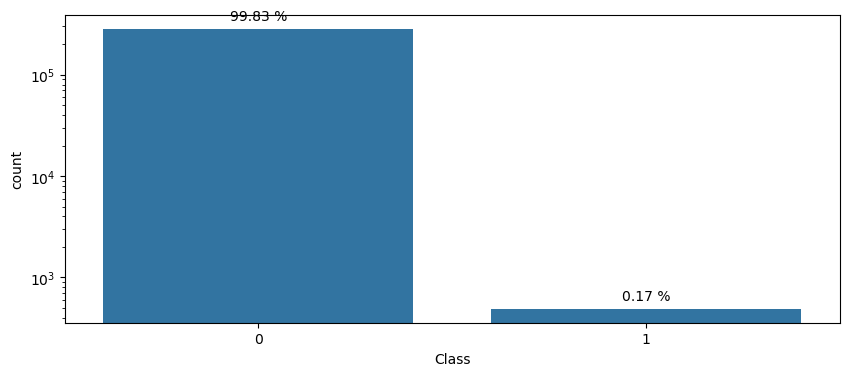

In [7]:
pl_barplot("Class",df, x_rot=0)

In [8]:
pl_valueCounts_perc("Class",df)

Class,count,percentage %
i64,u32,f64
0,284315,99.83
1,492,0.17


We have a highly imbalanced data, i.e., only 0.17% of transaction are fraudulent. 

In [9]:
df_class0= df.filter(pl.col("Class")==0)
df_class1= df.filter(pl.col("Class")==1)

In [10]:
df_class0.describe()

statistic,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",284315.0,284315.0,284315.0,284315.0,284315.0,284315.0,284315.0,284315.0,284315.0,284315.0,284315.0,284315.0,284315.0,284315.0,284315.0,284315.0,284315.0,284315.0,284315.0,284315.0,284315.0,284315.0,284315.0,284315.0,284315.0,284315.0,284315.0,284315.0,284315.0,284315.0,284315.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",94838.202258,0.008258,-0.006271,0.012171,-0.00786,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,-0.006576,0.010832,0.000189,0.012064,0.000161,0.007164,0.011535,0.003887,-0.001178,-0.000644,-0.001235,-0.000024,0.00007,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022,0.0
"""std""",47484.015786,1.929814,1.636146,1.459429,1.399333,1.356952,1.329913,1.178812,1.161283,1.089372,1.044204,1.003112,0.945939,0.995067,0.897007,0.91506,0.844772,0.749457,0.824919,0.811733,0.769404,0.716743,0.723668,0.621541,0.605776,0.520673,0.482241,0.399847,0.32957,250.105092,0.0
"""min""",0.0,-56.40751,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.29073,-14.741096,-4.797473,-15.144988,-5.791881,-18.392091,-4.391307,-10.11556,-17.098444,-5.36666,-7.213527,-54.49772,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.0,0.0
"""25%""",54230.0,-0.917535,-0.599465,-0.884537,-0.850071,-0.689384,-0.766847,-0.55144,-0.208633,-0.640407,-0.532879,-0.76344,-0.402095,-0.64806,-0.422452,-0.582804,-0.465531,-0.48264,-0.497414,-0.456362,-0.211763,-0.228509,-0.542399,-0.1617,-0.354425,-0.317143,-0.327073,-0.070852,-0.052949,5.65,0.0
"""50%""",84711.0,0.020023,0.06407,0.182158,-0.022405,-0.053457,-0.273123,0.041138,0.022041,-0.049964,-0.091872,-0.034923,0.141679,-0.013547,0.051947,0.048294,0.067377,-0.064833,-0.002787,0.003117,-0.062646,-0.029821,0.006736,-0.011147,0.041082,0.016417,-0.052227,0.00123,0.011199,22.0,0.0
"""75%""",139333.0,1.316224,0.800448,1.028373,0.737631,0.612182,0.399623,0.571019,0.326205,0.598237,0.455148,0.736362,0.619213,0.662498,0.49411,0.648843,0.523744,0.399925,0.501113,0.457504,0.132403,0.185627,0.528409,0.147522,0.439875,0.350594,0.240672,0.090573,0.077963,77.05,0.0
"""max""",172792.0,2.45493,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,23.745136,10.00219,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,22.614889,10.50309,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.16,0.0


In [11]:
df_class1.describe()

statistic,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",492.0,492.0,492.0,492.0,492.0,492.0,492.0,492.0,492.0,492.0,492.0,492.0,492.0,492.0,492.0,492.0,492.0,492.0,492.0,492.0,492.0,492.0,492.0,492.0,492.0,492.0,492.0,492.0,492.0,492.0,492.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.10513,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
"""std""",47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,4.897341,2.678605,4.654458,1.104518,4.27894,1.049915,3.865035,6.970618,2.899366,1.539853,1.346635,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0
"""min""",406.0,-30.55238,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,-24.588262,-1.702228,-18.683715,-3.127795,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-3.681904,-4.128186,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.86929,0.0,1.0
"""25%""",41243.0,-6.003422,1.189757,-8.631802,2.378367,-4.790055,-2.497522,-7.934389,-0.192892,-3.871297,-7.74848,1.975821,-8.681609,-0.978065,-9.657627,-0.641736,-6.557873,-11.939092,-4.659956,-0.29892,-0.171608,0.042619,-0.532228,-0.341881,-0.436539,-0.312361,-0.258802,-0.019579,-0.106667,1.0,1.0
"""50%""",75581.0,-2.335655,2.719882,-5.074445,4.180779,-1.513022,-1.422686,-3.029283,0.625278,-2.203224,-4.56526,3.586395,-5.487911,-0.063634,-6.713878,-0.056363,-3.537056,-5.301273,-1.648406,0.647709,0.284831,0.594623,0.053061,-0.072173,-0.060327,0.092007,0.008277,0.395171,0.146793,9.29,1.0
"""75%""",128471.0,-0.41982,4.960892,-2.276921,6.348557,0.213863,-0.413647,-0.950463,1.760341,-0.788388,-2.637442,5.299236,-2.998815,0.671785,-4.287996,0.607986,-1.233958,-1.3519,0.09147,1.645414,0.821405,1.244287,0.616383,0.308325,0.284122,0.45609,0.395528,0.824685,0.380246,105.89,1.0
"""max""",170348.0,2.132386,22.057729,2.25021,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,4.031435,12.018913,1.375941,2.81544,3.442422,2.471358,3.139656,6.739384,3.790316,5.228342,11.059004,27.202839,8.361985,5.46623,1.091435,2.208209,2.745261,3.052358,1.779364,2125.87,1.0


# Data exploration

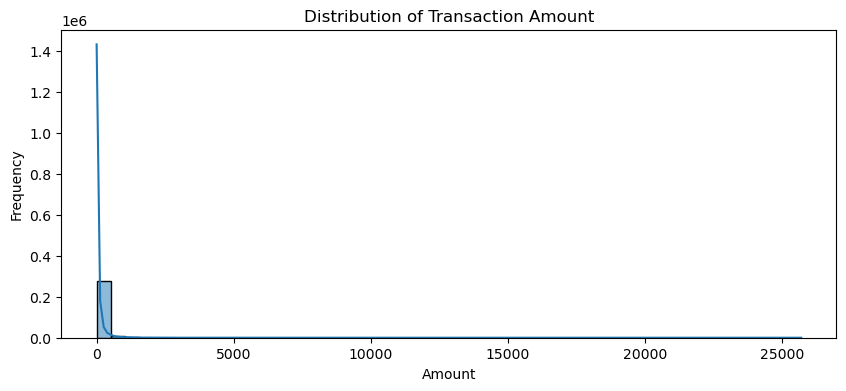

In [12]:
# Distribution of the 'Amount' feature
plt.figure(figsize=(10,4))
sns.histplot(df["Amount"], bins=50, kde=True)
plt.title("Distribution of Transaction Amount")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

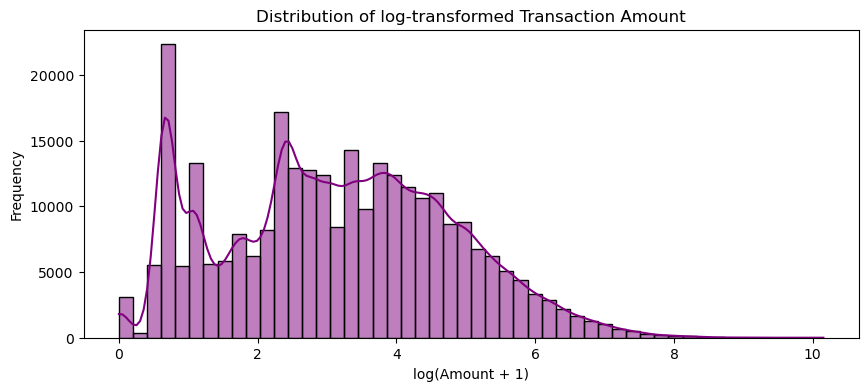

In [13]:
# Log transform the 'Amount' to reduce skewness and plot
plt.figure(figsize=(10,4))
sns.histplot(np.log1p(df["Amount"]), bins=50, kde=True, color="purple")
plt.title("Distribution of log-transformed Transaction Amount")
plt.xlabel("log(Amount + 1)")
plt.ylabel("Frequency")
plt.show()

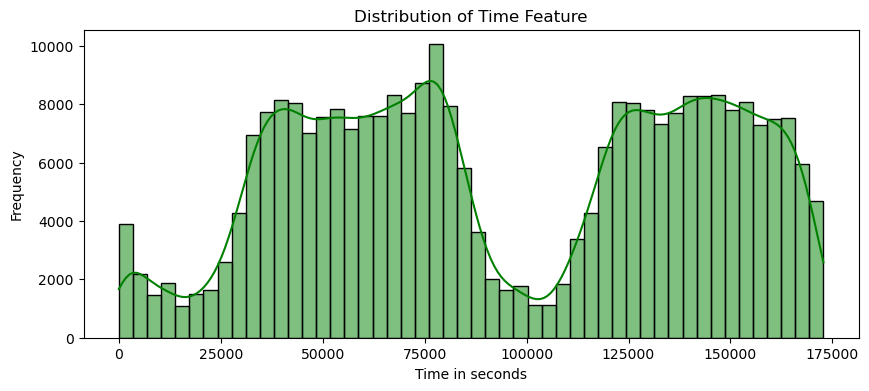

In [95]:
# Distribution of 'Time' feature if relevant
plt.figure(figsize=(10,4))
sns.histplot(df["Time"], bins=50, kde=True, color="green")
plt.title("Distribution of Time Feature")
plt.xlabel("Time in seconds")
plt.ylabel("Frequency")
plt.show()

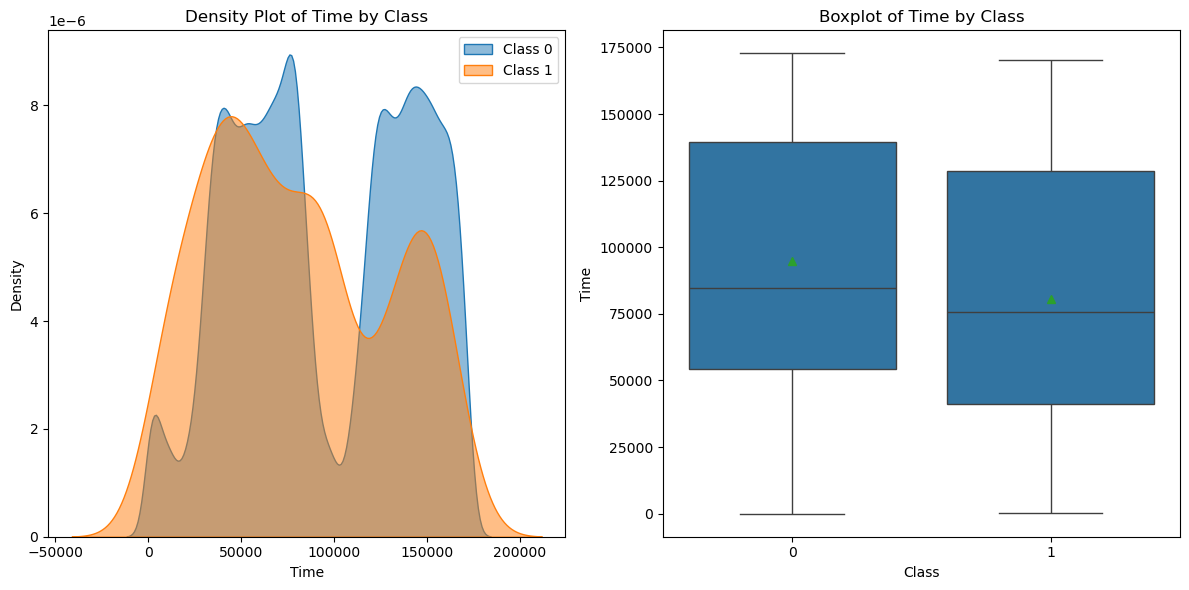

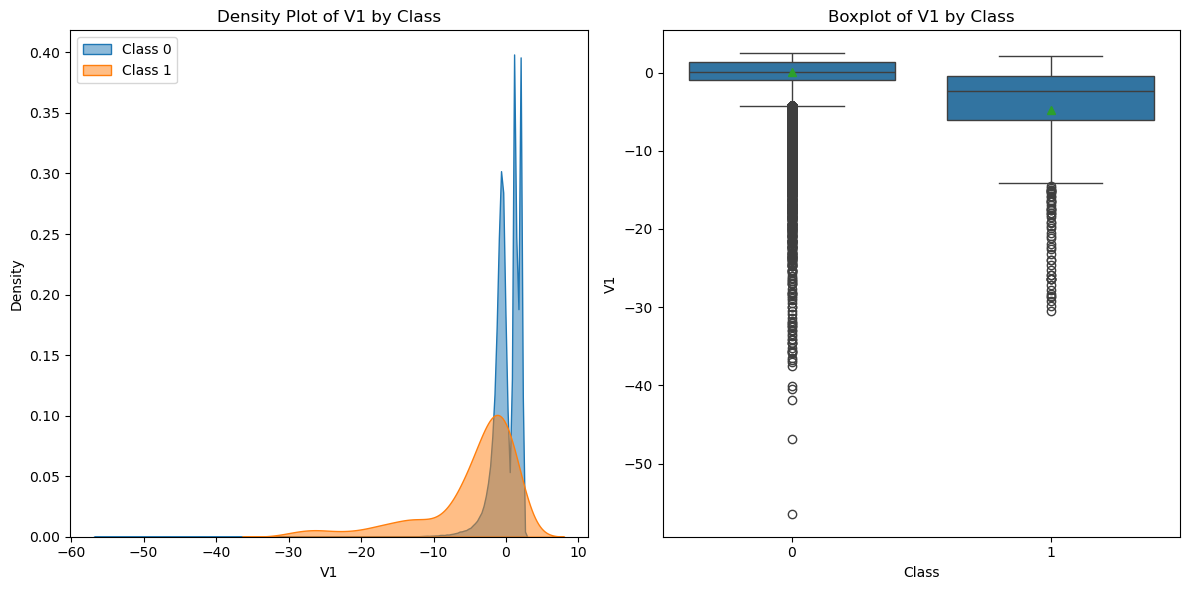

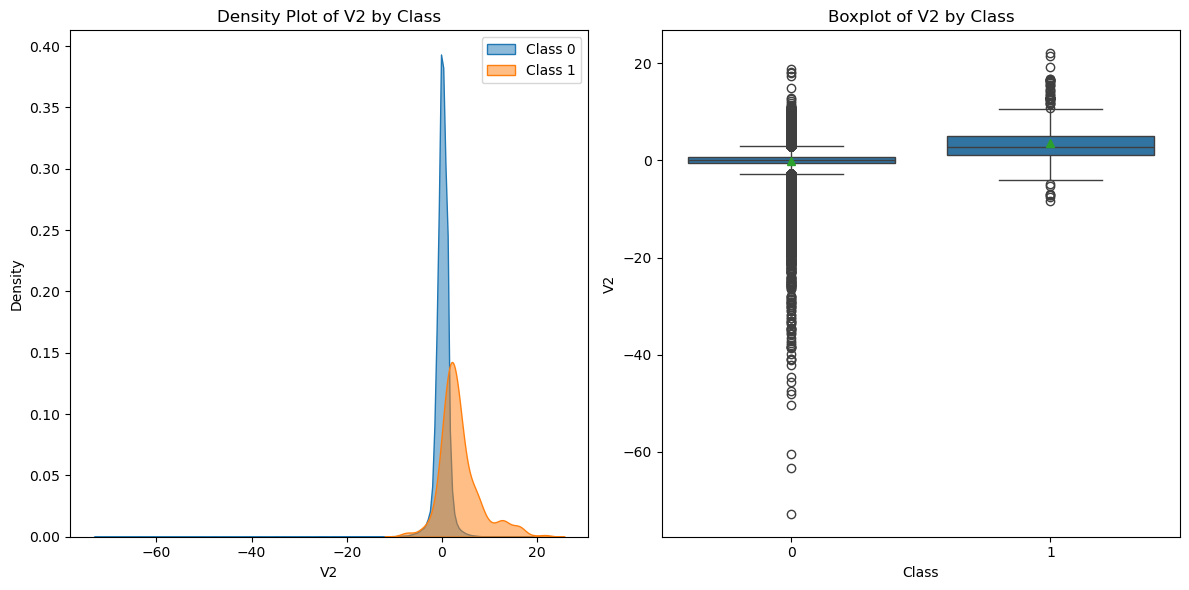

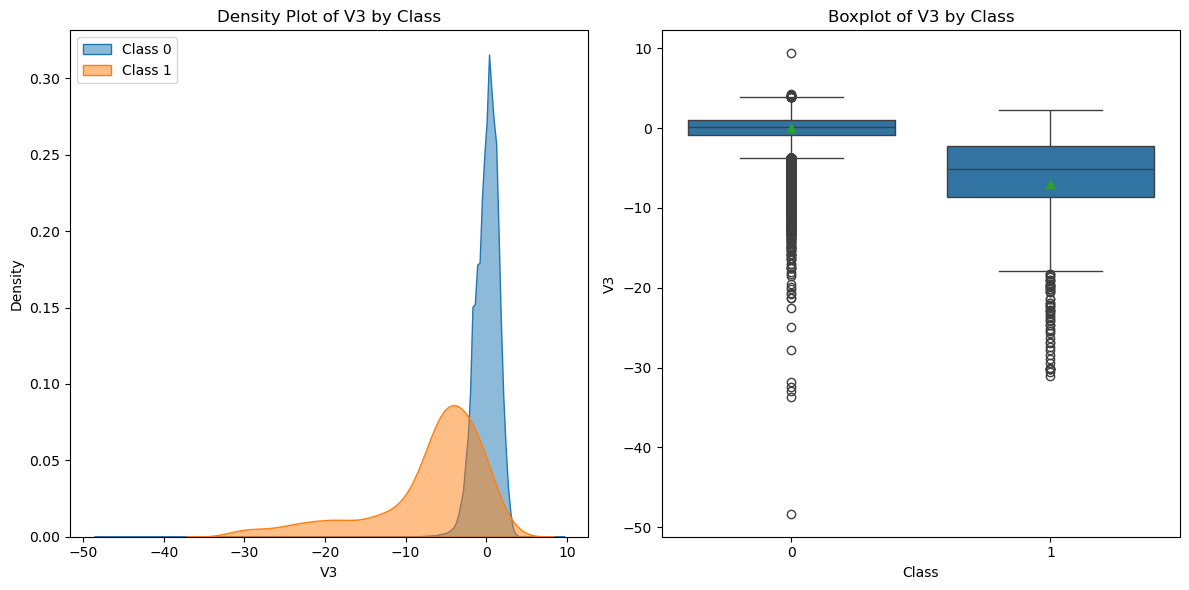

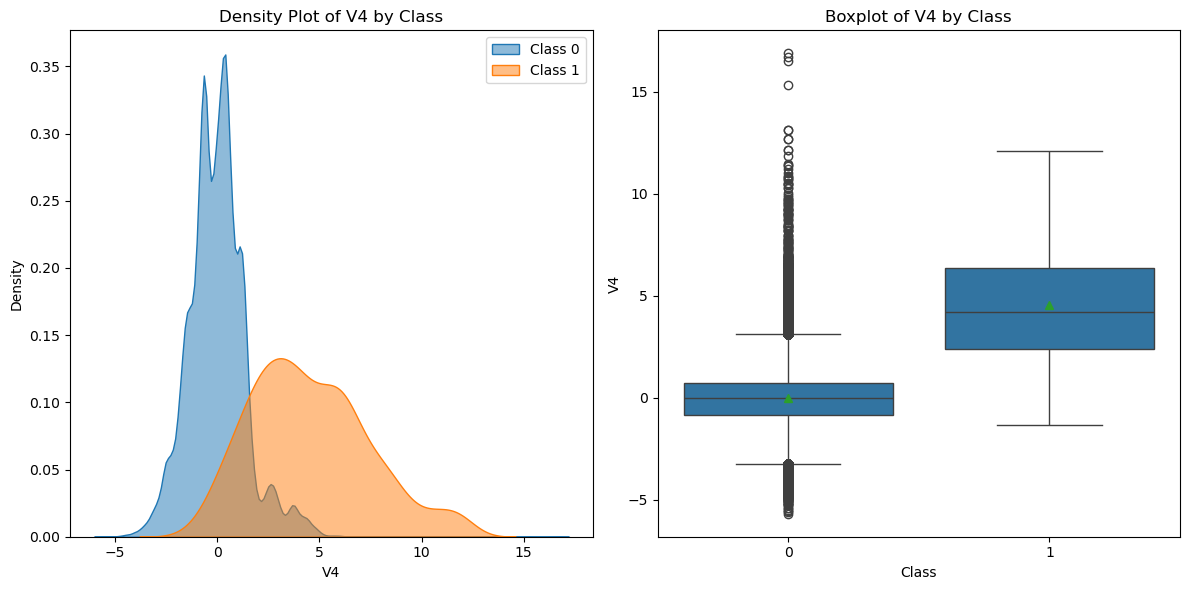

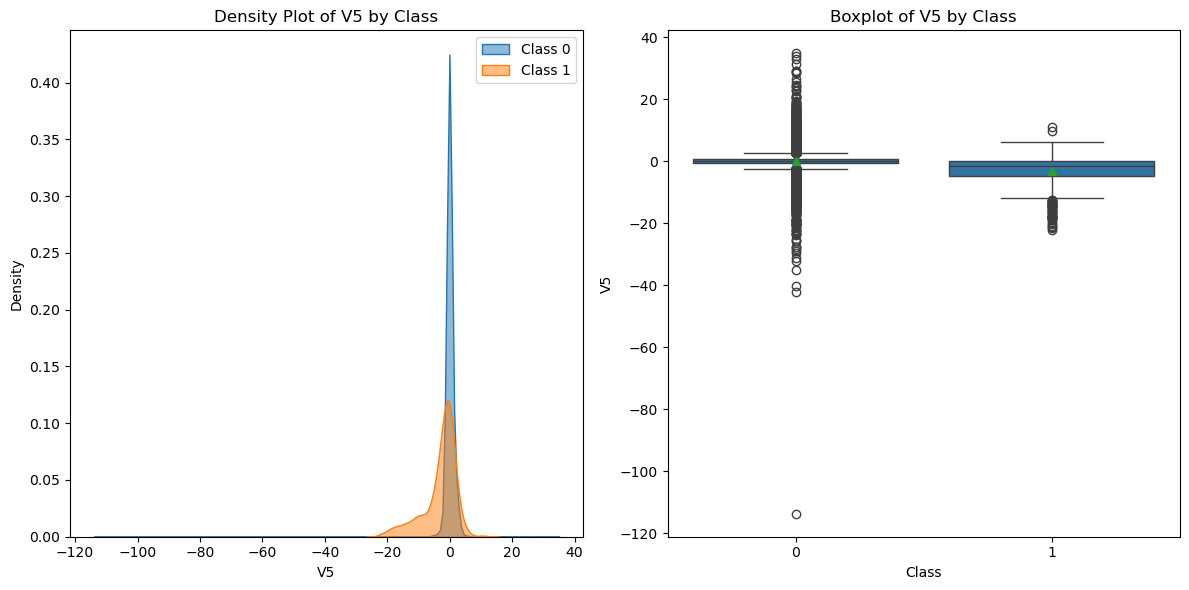

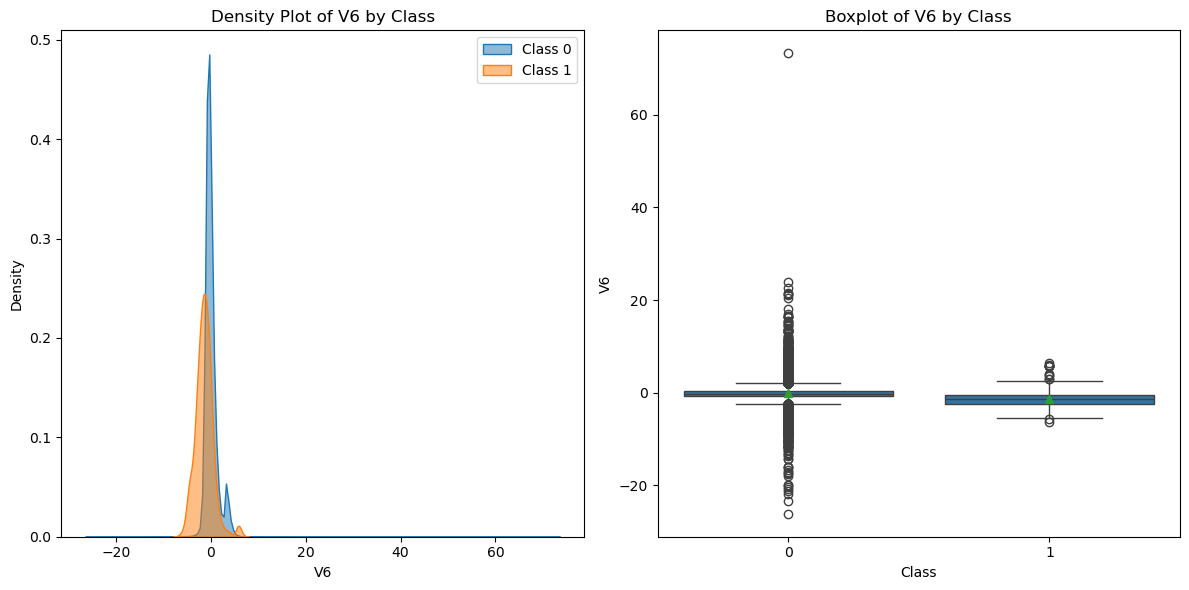

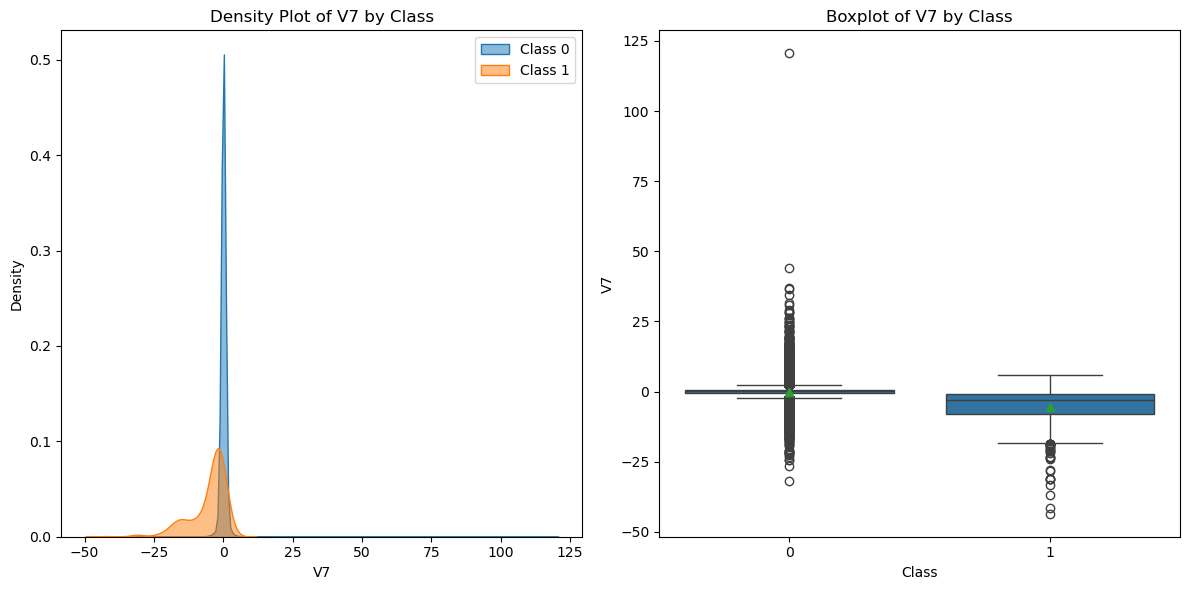

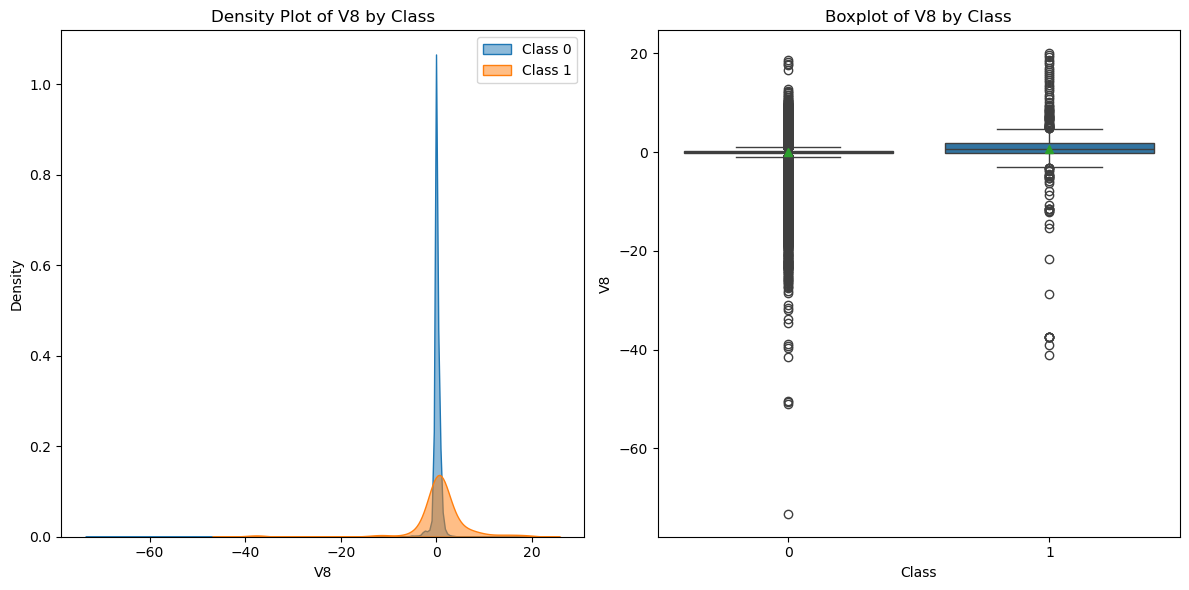

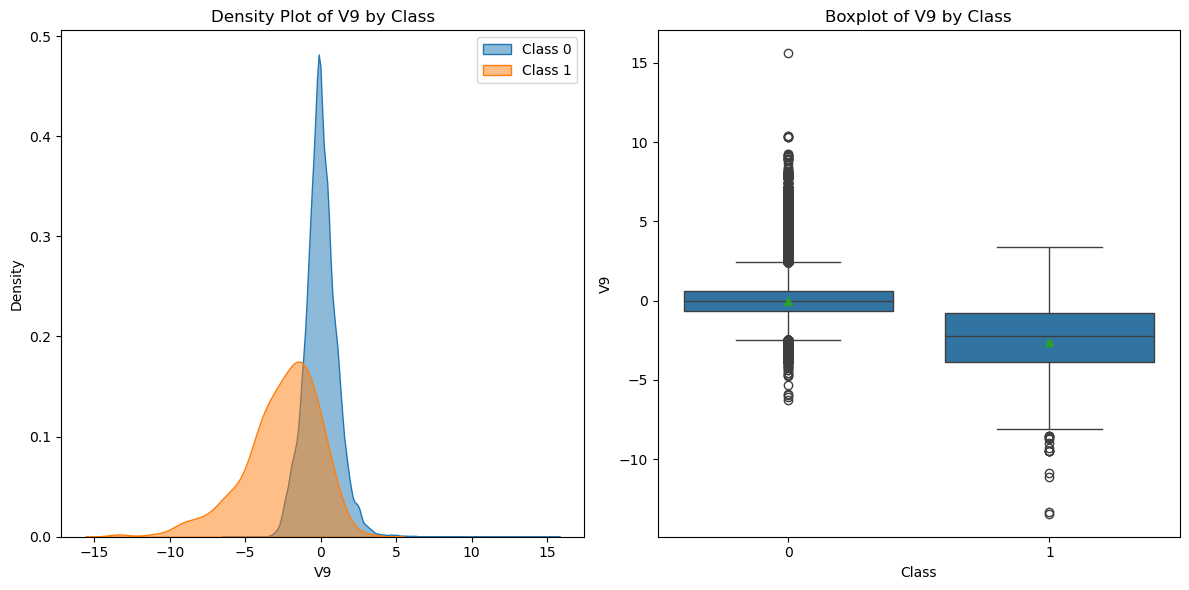

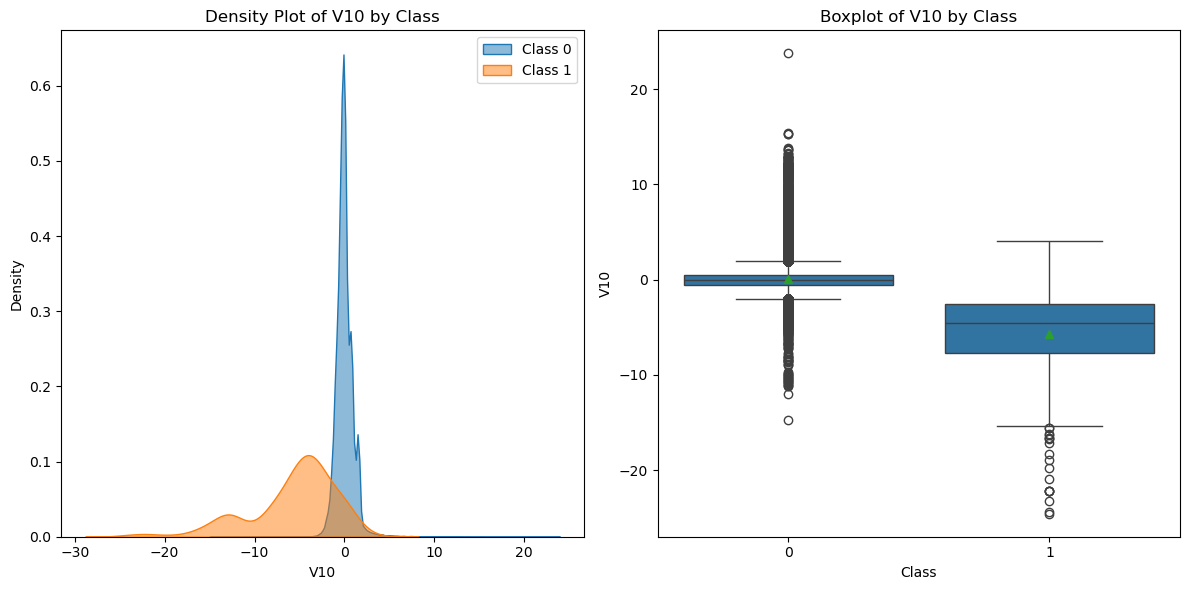

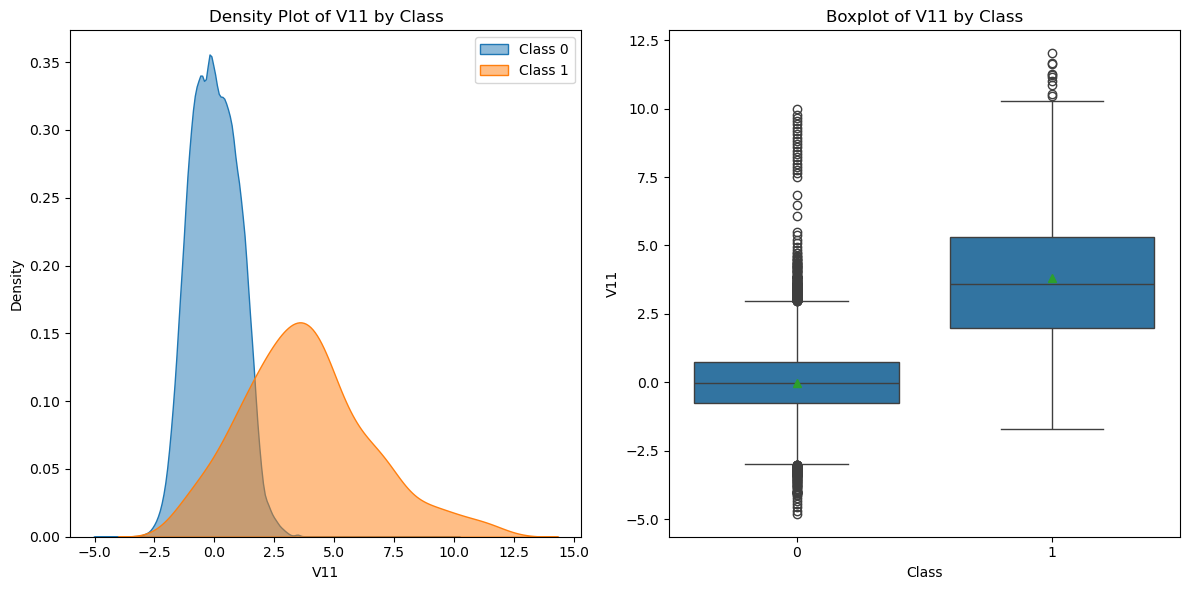

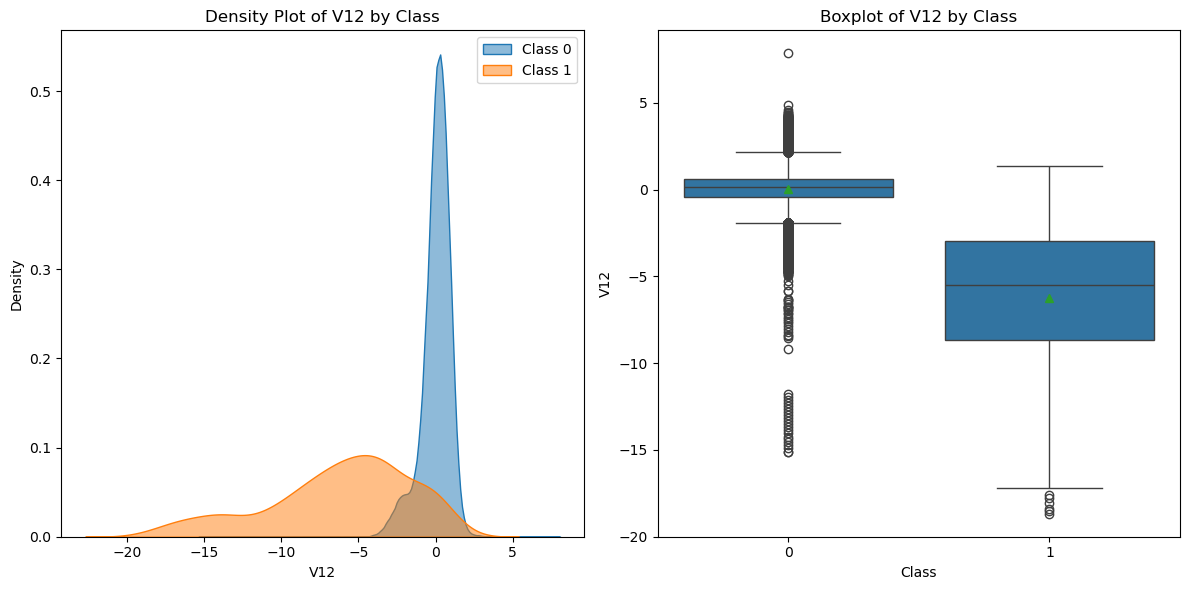

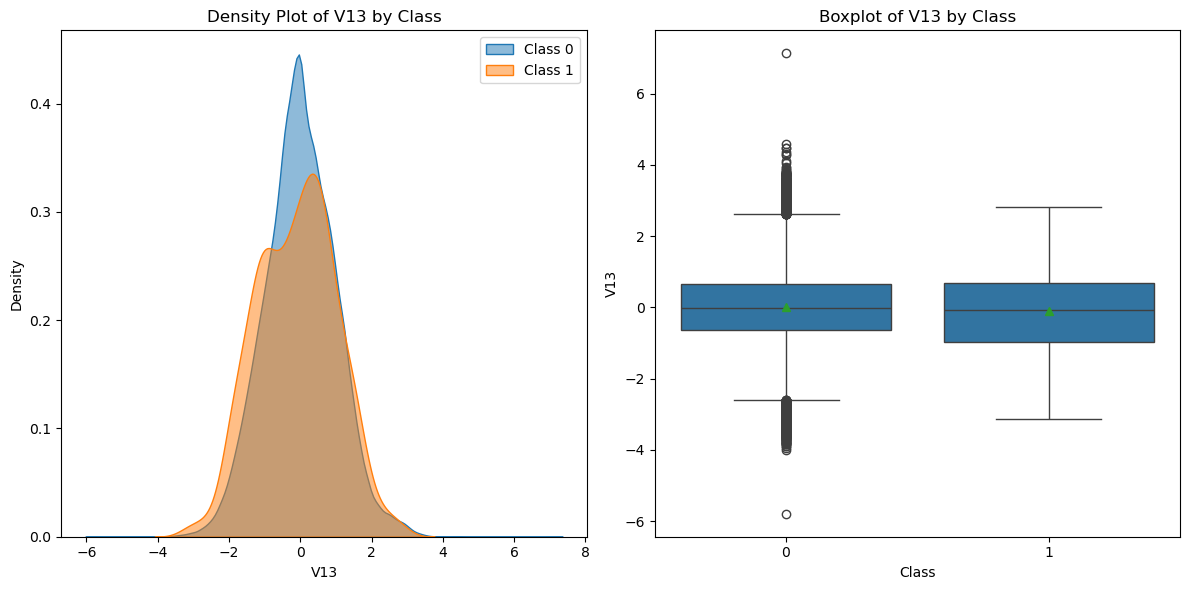

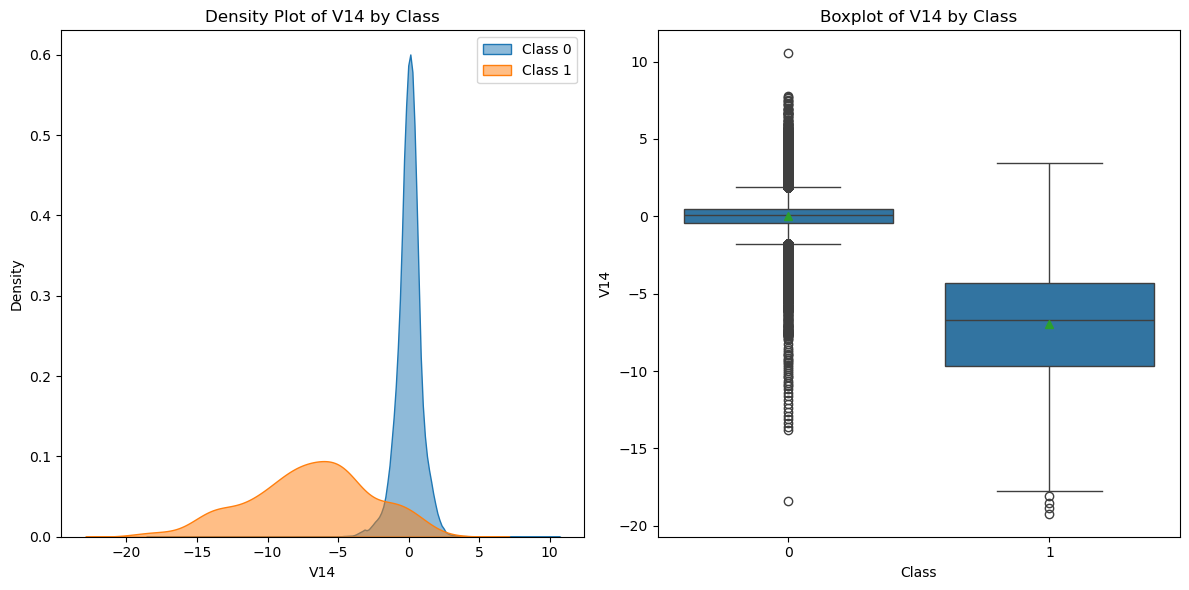

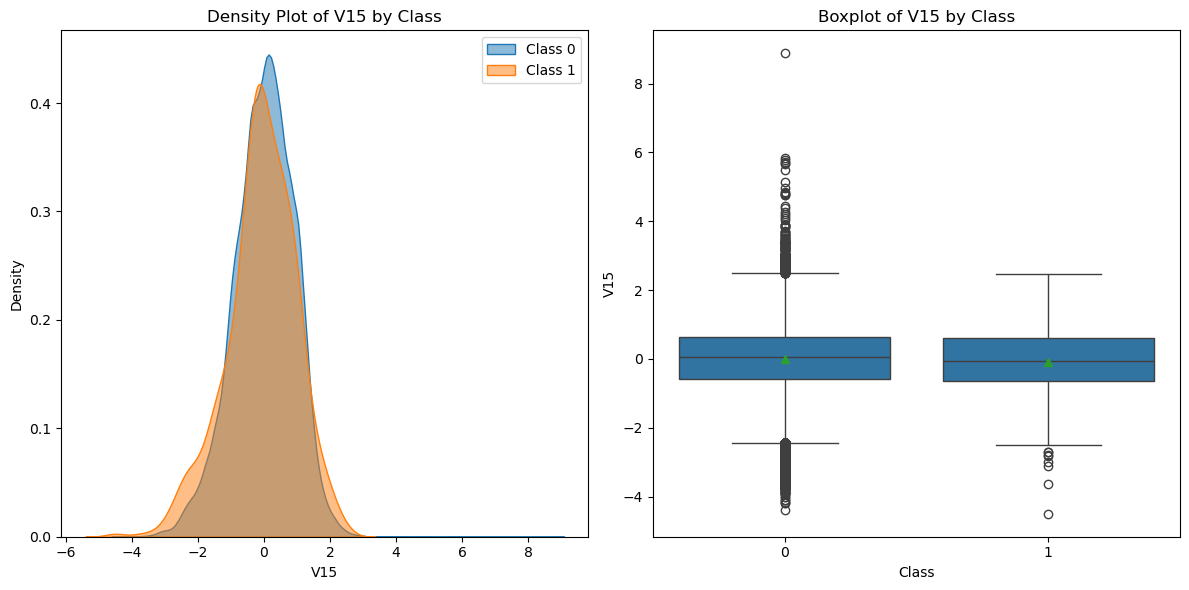

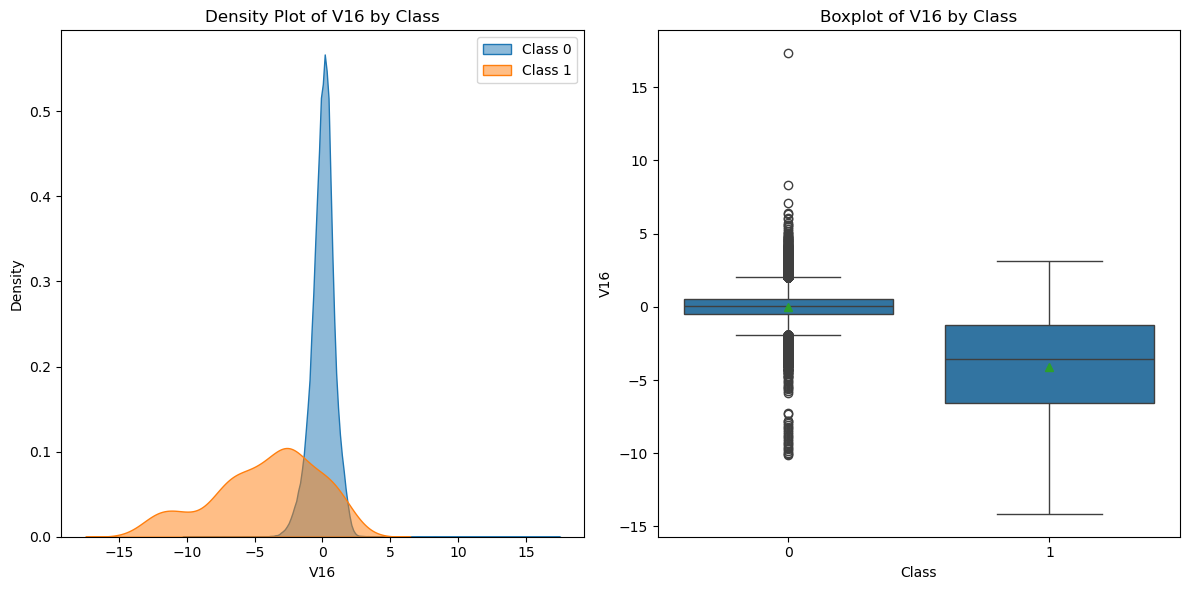

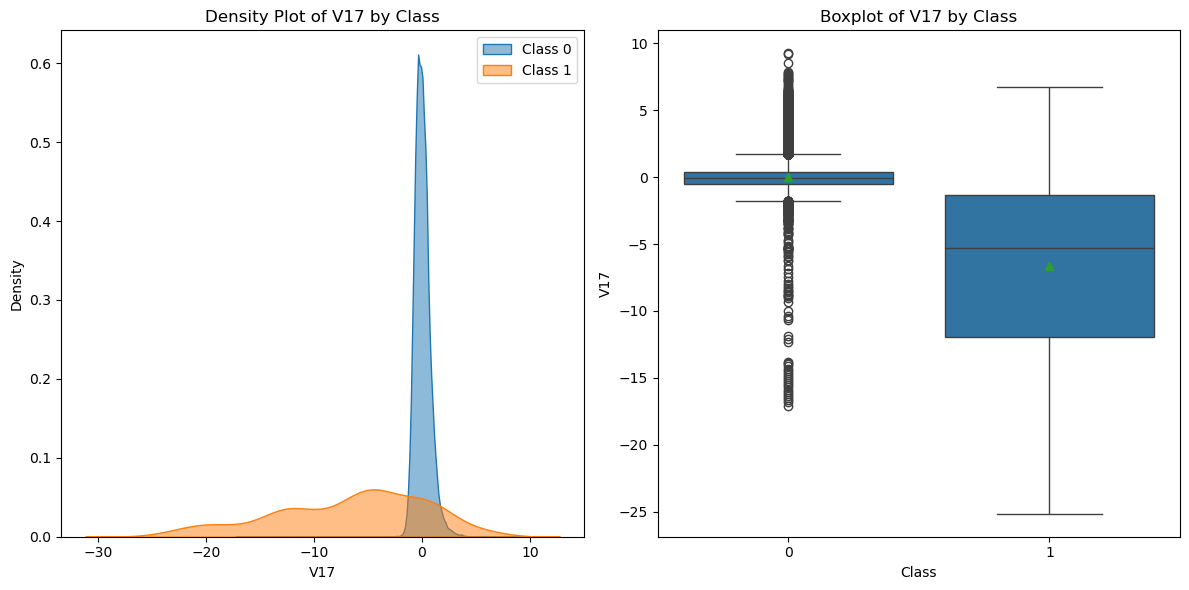

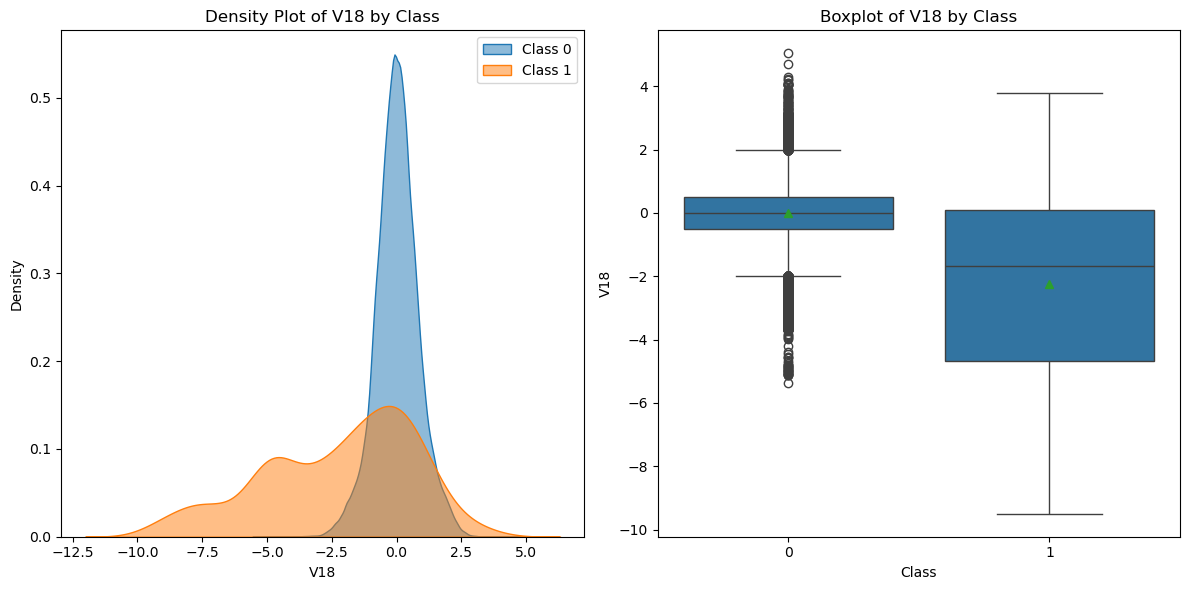

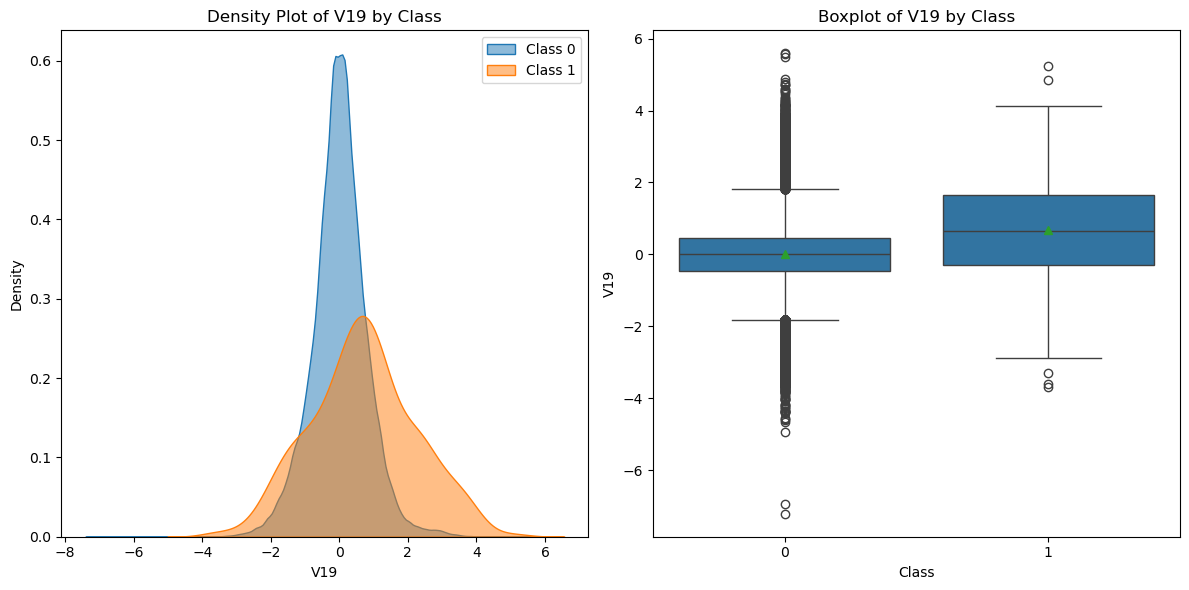

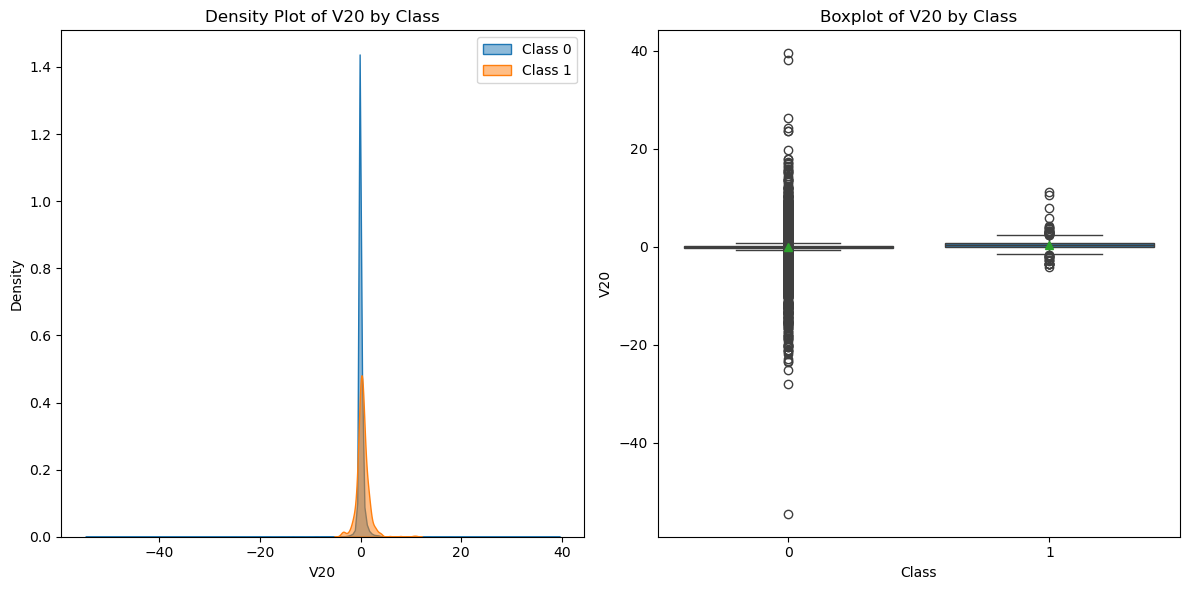

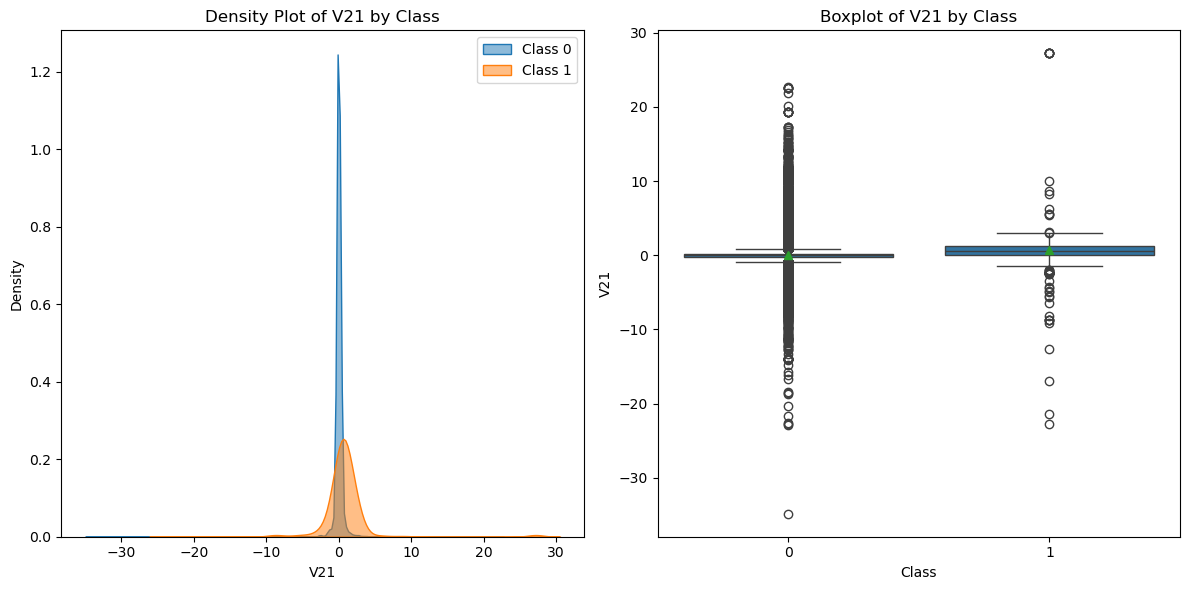

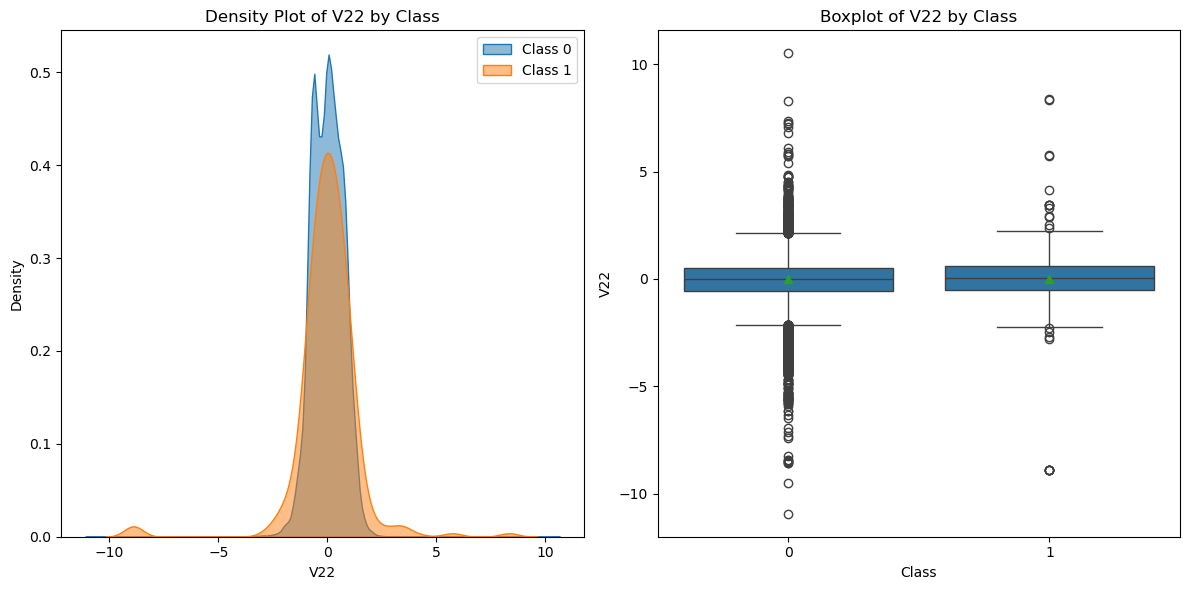

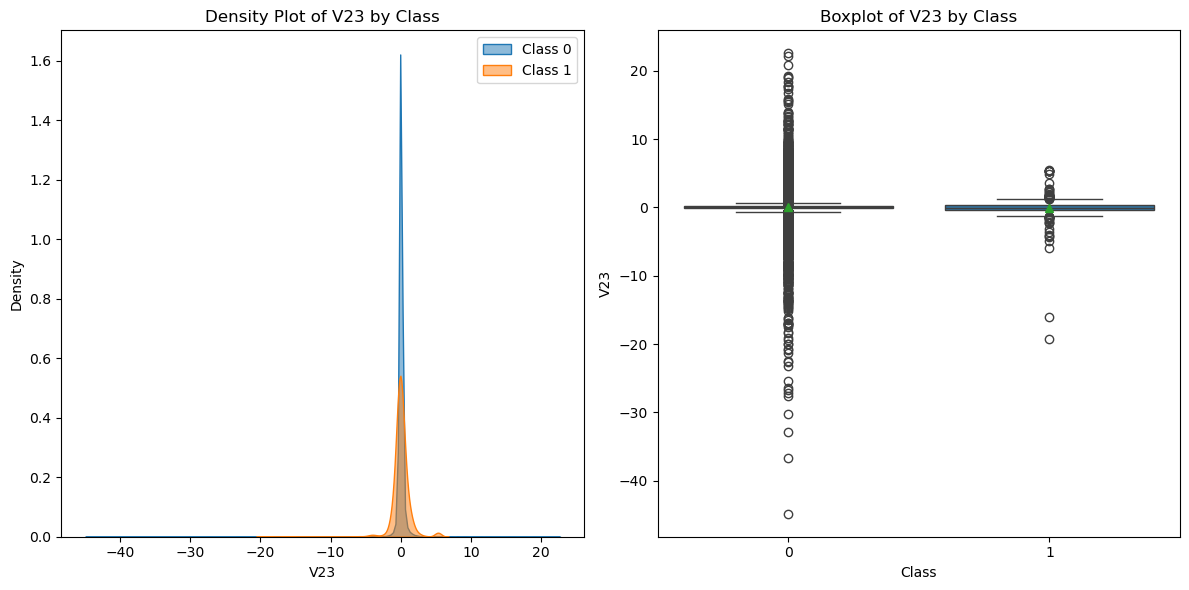

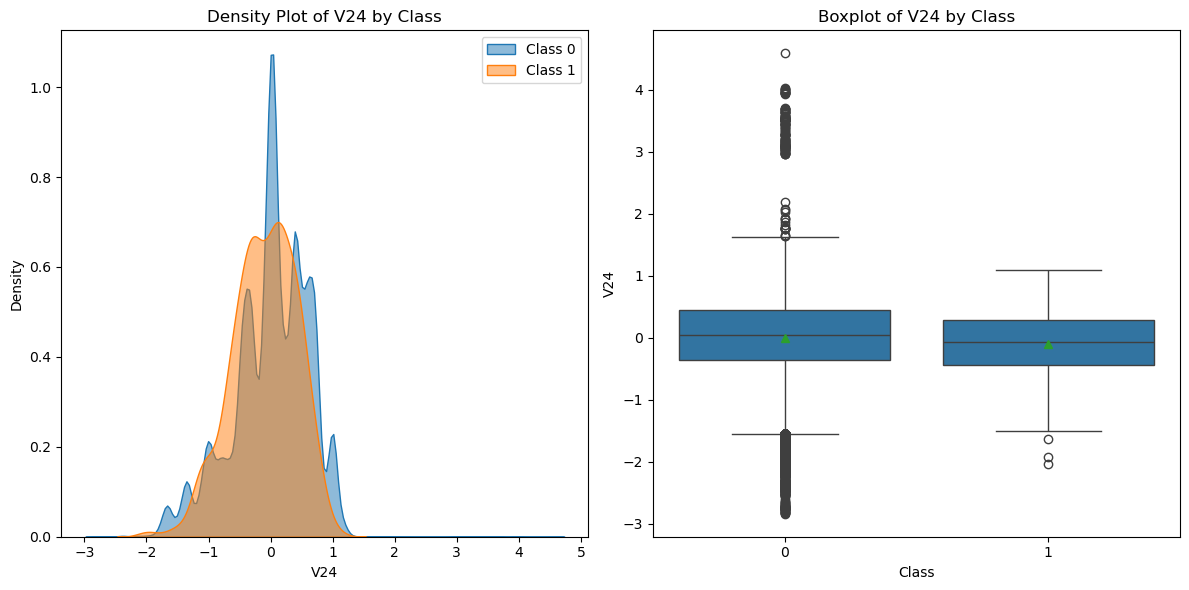

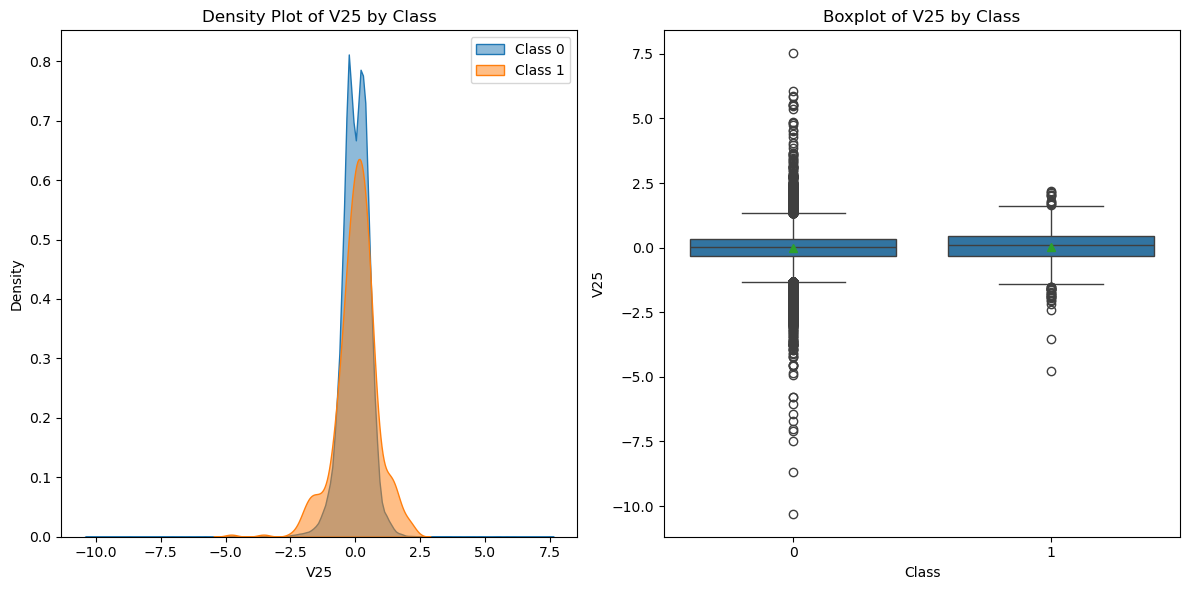

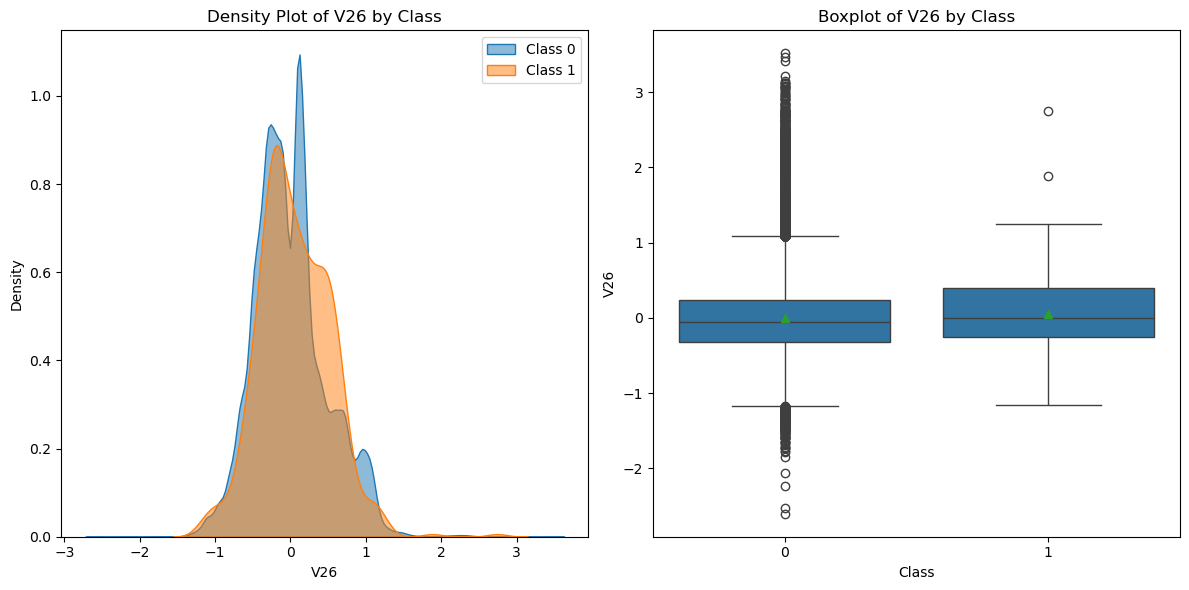

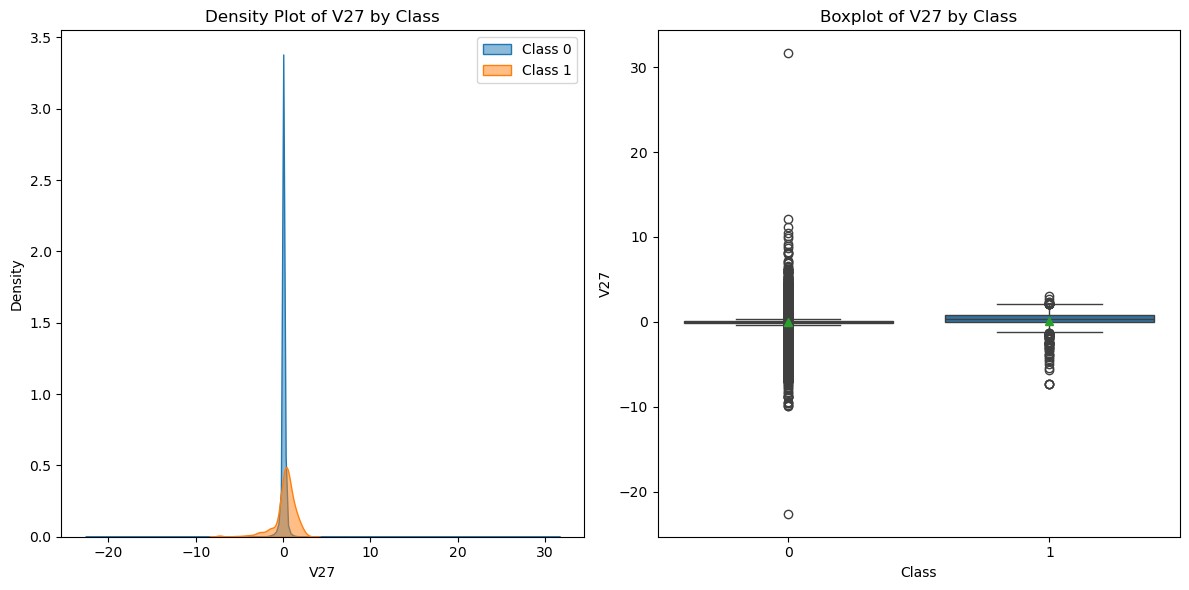

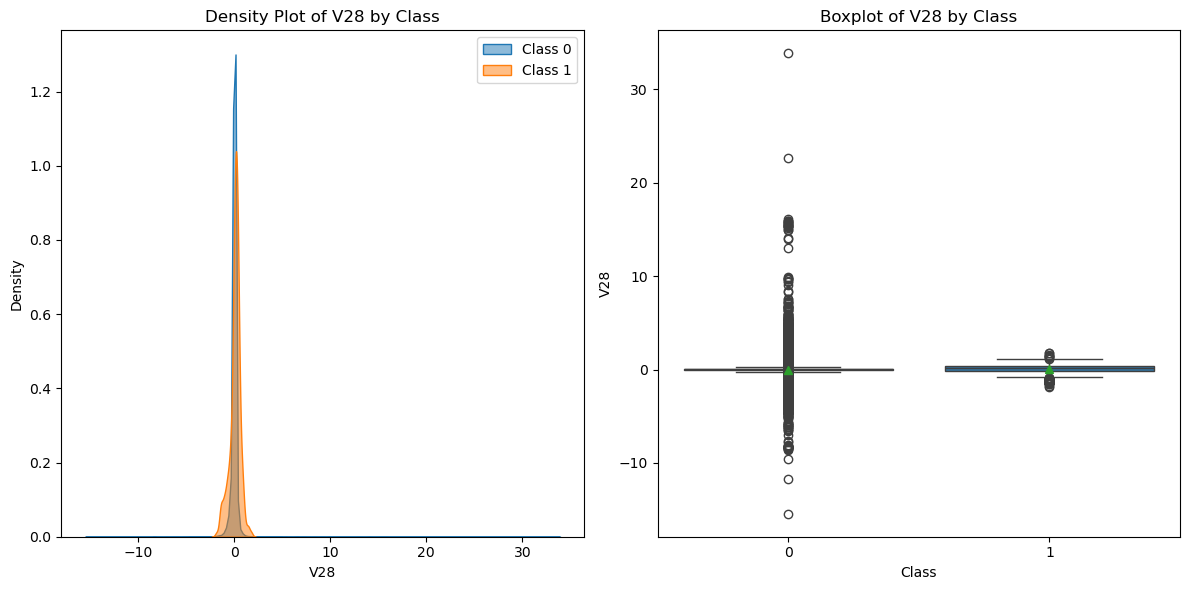

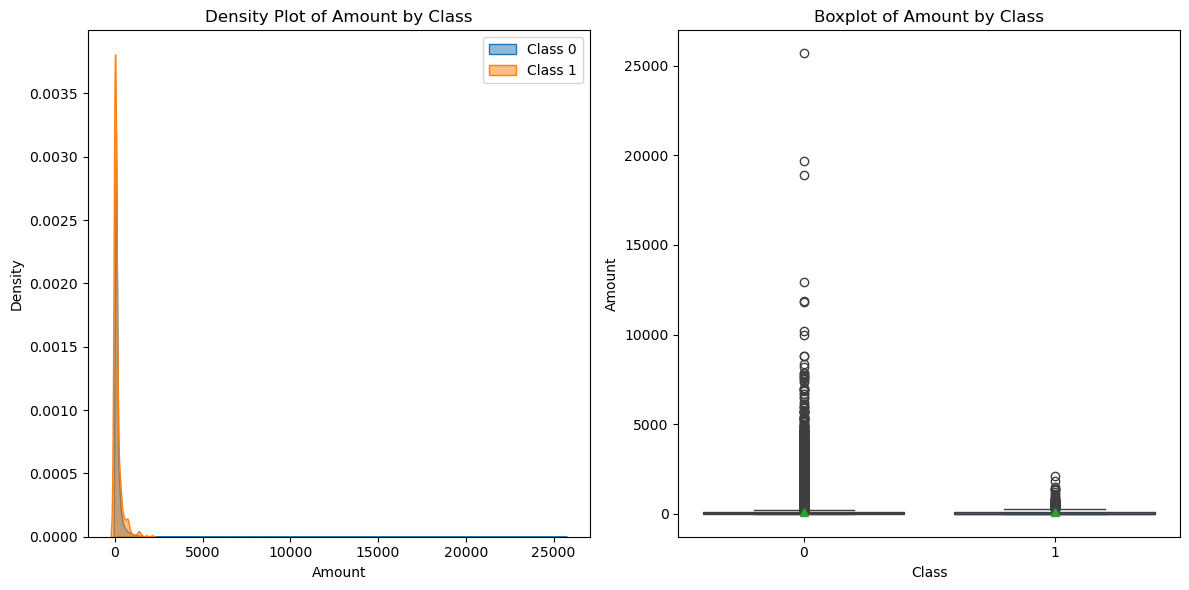

In [22]:
for feature in df.select(cs.contains(("V","Time","Amount"))).columns:
    # # Boxplots 
    # plt.figure(figsize=(8, 4))
    # sns.boxplot(x="Class", y=feature, data=df)
    # plt.title(f"Boxplot of {feature} by Class")
    # plt.show()
    # Overlayed density plots for the same feature
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    sns.kdeplot(ax = ax1, data=df_class0[feature], label='Class 0', fill=True, alpha=0.5)
    sns.kdeplot(ax = ax1, data=df_class1[feature], label='Class 1', fill=True, alpha=0.5)
    ax1.set_title(f"Density Plot of {feature} by Class")
    ax1.set_xlabel(feature)
    ax1.set_ylabel("Density")
    ax1.legend()
    # Boxplots 
    s = sns.boxplot(ax = ax2, x="Class", y= feature, data=df, showmeans=True)
    ax2.set_title(f"Boxplot of {feature} by Class")
    plt.tight_layout()
    plt.show()

we can observe a good selectivity in terms of distribution for the two values of Class: 
- V4, V11 have clearly separated distributions for Class values 0 and 1
- V12, V14, V18 are partially separated
- V1, V2, V3, V10 have a quite distinct profile
- V25, V26, V28 have similar profiles for the two values of Class

In [18]:
# fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
# s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=df,showfliers=True, showmeans=True)
# # the same plot without the outliers, showing only the main box, whiskers, and median.
# s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=df,showfliers=False,showmeans=True)
# plt.show();

In [19]:
# s = sns.boxplot(x="Class", y="Time", hue="Class",data=df,showfliers=True, showmeans=True)
# plt.show();

In [72]:
# transform seconds to hour
df= df.with_columns(
    (pl.col("Time")/3600).cast(pl.Float32)
    .alias("Hour")
)

In [74]:
df

Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,f32
0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.5516,-0.617801,-0.99139,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.0
0.0,1.191857,0.266151,0.16648,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.16717,0.125895,-0.008983,0.014724,2.69,0,0.0
1.0,-1.358354,-1.340163,1.773209,0.37978,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.52498,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.000278
1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.1083,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.5,0,0.000278
2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.11967,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.20601,0.502292,0.219422,0.215153,69.99,0,0.000556
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.35617,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.68292,1.475829,0.213454,0.111864,1.01448,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,47.996113
172787.0,-0.732789,-0.05508,2.03503,-0.738589,0.868229,1.058415,0.02433,0.294869,0.5848,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,47.996387
172788.0,1.919565,-0.301254,-3.24964,-0.557828,2.630515,3.03126,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,47.996666


In [100]:
# agg_df= df.group_by(['Hour', 'Class']).agg(
#     [
#         pl.col("Amount").len().alias("transaction"),
#         pl.col("Amount").min().alias("min_transaction"),
#         pl.col("Amount").max().alias("max_transaction"),
#         pl.col("Amount").mean().alias("mean_transaction"),
#         pl.col("Amount").median().alias("median_transaction"),
#         pl.col("Amount").sum().alias("total_transaction"),
#         pl.col("Amount").var().alias("variance"),
#     ]
# )
# agg_df

In [101]:
# agg_df_class0= agg_df.filter(pl.col("Class")==0)
# agg_df_class1= agg_df.filter(pl.col("Class")==1)

In [102]:
# def plot_transaction_amount_per_class(df, y, x= "Hour",target= "Class"):
#     agg_df_class0= agg_df.filter(pl.col(target)==0)
#     agg_df_class1= agg_df.filter(pl.col(target)==1)

#     print(f".......Plotting {y} vs hour.......... ")
#     # Create a figure with 2 rows and 1 column of subplots
#     fig, axes = plt.subplots(2, 1, figsize=(8, 6))  # (rows, cols)
#     # First subplot
#     sns.scatterplot(ax= axes[0],data= agg_df_class0, x= x, y=y)
#     axes[0].set_title("Not fradulent")
#     # Second subplot
#     sns.scatterplot(ax= axes[1],data= agg_df_class1, x= x, y=y, color="orange")
#     axes[1].set_title("Fradulent")
#     # Adjust layout for better spacing
#     plt.tight_layout()
#     # Show the plot
#     plt.show()

# for col in agg_df.select(cs.contains("transaction")).columns:
#     plot_transaction_amount_per_class(agg_df, col)

In [86]:
# # To remove potential outliers from the DataFrame
# df_clean = remove_outliers_iqr(df, factor=3)
# print("Dataset shape after outlier removal:", df_clean.shape)

Dataset shape after outlier removal: (223872, 32)


In [88]:
# pl_valueCounts_perc("Class", df_clean)

Class,count,percentage %
i64,u32,f64
0,223872,100.0


In [20]:
# df_clean

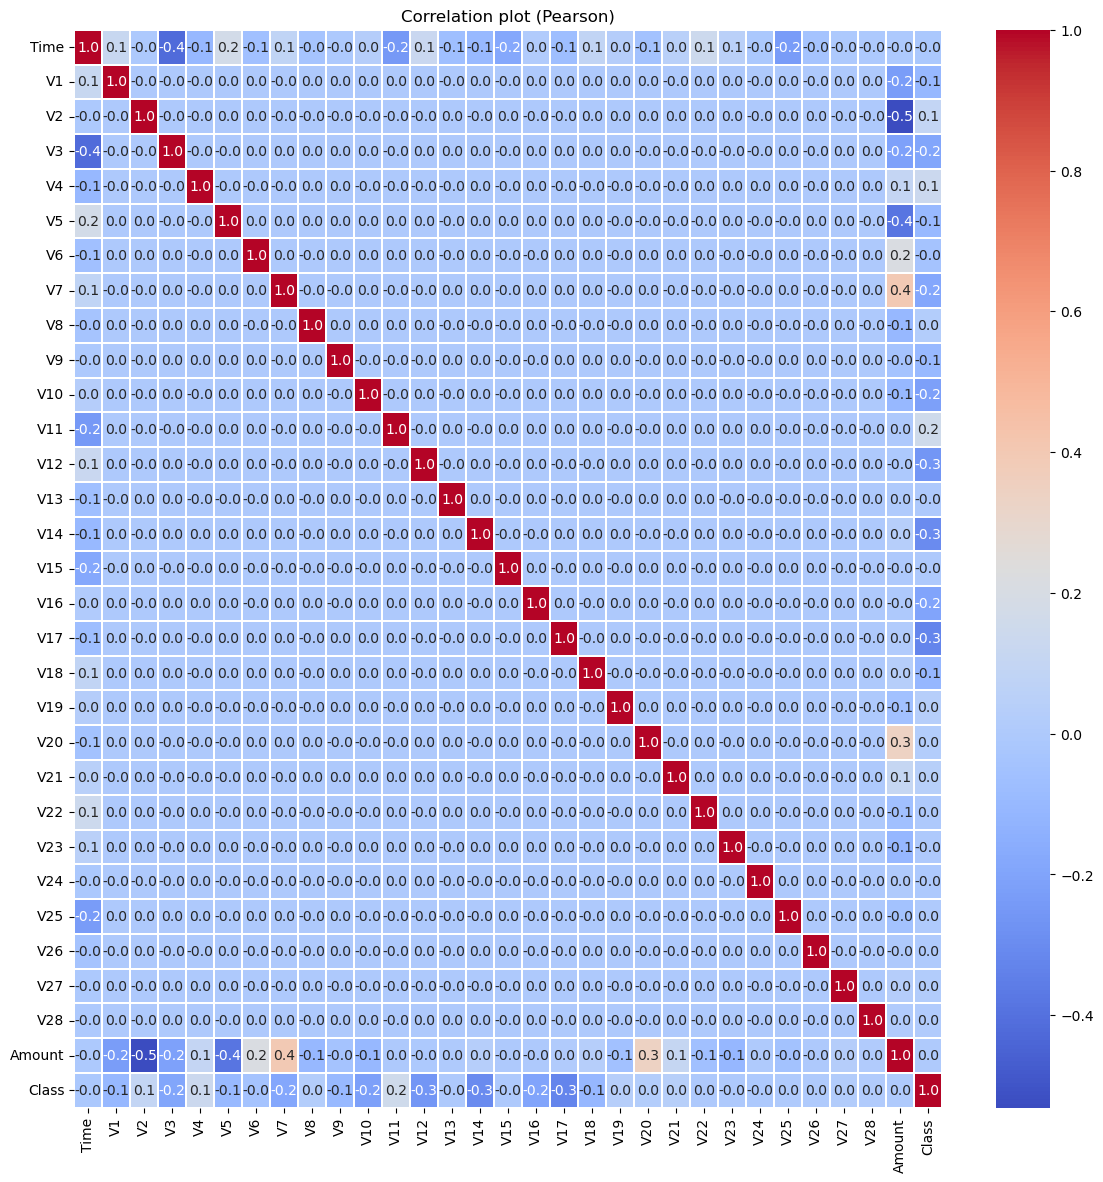

In [21]:
plt.figure(figsize = (14,14))
plt.title('Correlation plot (Pearson)')
corr = df.corr()
sns.heatmap(
    corr,
    xticklabels=corr.columns,
    yticklabels=corr.columns,
    linewidths=.12,
    cmap="coolwarm", 
    annot=True, 
    fmt=".1f"
)
plt.show()

there is no notable correlation between features V1-V28.
- Time has inverse correlation with v3
- Amount has inverse correlation with V2, v5
- Amount has correlation with V7

Variance Inflation Factor (VIF) Values

- VIF is used to detect multicollinearity in a regression model. It quantifies how much the variance of a regression coefficient is inflated due to collinearity among predictors.
    - VIF = 1 → No multicollinearity (ideal scenario).
    - VIF between 1 and 5 → Low to moderate multicollinearity, generally acceptable.
    - VIF between 5 and 10 → High multicollinearity, potential concern.
    - VIF > 10 → Severe multicollinearity; strong correlation among predictors, making coefficient estimates unstable.

In [20]:
# VIF dataframe
vif_df = return_VIF(df=df, target_col="Class")
vif_df

,Feature,VIF
0,Time,2.814750e+14
30,Hour,2.814750e+14
29,Amount,1.211670e+01
31,intercept,1.006538e+01
2,V2,4.422403e+00
7,V7,2.929045e+00
5,V5,2.859323e+00
20,V20,2.399180e+00
3,V3,1.877345e+00
1,V1,1.651912e+00


In [ ]:
# # Optionally, plot pairplot for a subset of features (e.g., the first 4 principal components and Class)
# subset_features = ["V2", "V5", "V7", "V20", "V3","Class"]
# sns.pairplot(df[subset_features].to_pandas(), hue="Class", diag_kind="kde", corner=True)
# plt.suptitle("Pairplot for Selected Features", y=1.02)
# plt.show()